In [1]:
from analysis.utils import module_reload
module_reload('analysis')
from analysis.import_data import import_true_reco
from analysis.calc import get_kinematics
from analysis.plot_matplotlib import plot_hist, export_figures
import seaborn as sns
import numpy as np

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Select events for VEGAS integration

In [4]:
import vegas
import math

def f(x):
    dx2 = 0
    for d in range(4):
        dx2 += (x[d] - 0.5) ** 2
    return math.exp(-dx2 * 100.) * 1013.2118364296088

integ = vegas.Integrator([[-1, 1], [0, 1], [0, 1], [0, 1]])

result = integ(f, nitn=10, neval=1000)
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.88(98)        1.88(98)            0.00     1.00
  2   1.36(26)        1.39(25)            0.25     0.61
  3   1.06(15)        1.14(13)            0.77     0.46
  4   1.058(70)       1.078(61)           0.63     0.59
  5   0.966(34)       0.993(30)           1.11     0.35
  6   1.015(24)       1.006(19)           0.96     0.44
  7   0.978(18)       0.992(13)           0.98     0.43
  8   0.966(15)       0.9806(98)          1.08     0.37
  9   0.969(14)       0.9766(80)          1.01     0.43
 10   0.990(12)       0.9808(65)          0.99     0.44

result = 0.9808(65)    Q = 0.44


In [9]:
result.itn_results

[1.88(98),
 1.36(26),
 1.06(15),
 1.058(70),
 0.966(34),
 1.015(24),
 0.978(18),
 0.966(15),
 0.969(14),
 0.990(12)]

In [5]:
np.save('/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/notebooks/results/test.npy', result, allow_pickle=True)

In [6]:
a = np.load('/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/notebooks/results/test.npy', allow_pickle=True)

In [7]:
a

array(0.9808(65), dtype=object)

In [2]:
df = import_true_reco()
zhh = df[df['is_zhh'] == 1]
zzh = df[df['is_zzh'] == 1]

Using cached file from /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/comparison_reco_zhh_zzh.npy
Correcting 56590 entries (56.55%)


<Axes: xlabel='error_code', ylabel='count'>

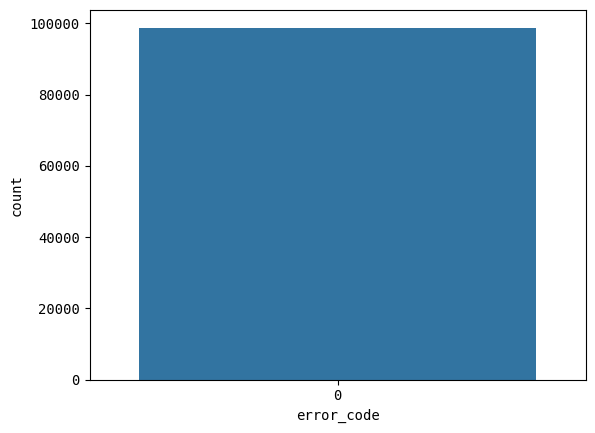

In [5]:
sns.countplot(df, x='error_code')

In [6]:
from analysis.mem_ana import constants
from analysis.mem_ana import load_results

nZHH * ( 1 + ZHH/ZZH) = nTOT

In [74]:
nTOT = 4096
frac = constants['sigma_zhh']/constants['sigma_zzh']

nZHH = int(nTOT / (1 + frac))
nZZH = nTOT - nZHH
print(f'Total of {nTOT} events with {nZHH} ZHH and {nZZH} ZZH')

Total of 4096 events with 3606 ZHH and 490 ZZH


In [75]:
zhh_indices = df[df['is_zhh'] == True].index
zzh_indices = df[df['is_zzh'] == True].index

In [81]:
np.random.seed(42)
selected_zhh = np.random.choice(zhh_indices, nZHH, replace=False)
selected_zzh = np.random.choice(zzh_indices, nZZH, replace=False)

assert(not 0 in np.unique(df.iloc[selected_zhh]['is_zhh'], return_counts=True)[0])
assert(not 0 in np.unique(df.iloc[selected_zzh]['is_zzh'], return_counts=True)[0])

for i in selected_zhh: print(i)
for i in selected_zzh: print(i)

33709
56314
74164
81082
57046
76779
24666
60105
23757
77284
50739
39139
72773
64643
33049
19009
34383
37988
77638
84221
19263
25246
34640
25612
62977
31773
54356
59157
36917
57800
31652
54453
52544
41644
79854
79467
61299
16249
76330
28518
68682
82096
56150
39894
19780
82647
81141
47973
33932
72553
79669
84341
38927
21229
61536
68545
71186
55499
28164
26835
49659
15119
20968
44717
84107
82567
56446
64394
53293
16194
35009
35996
66455
71328
16819
77442
66101
83555
60947
22721
44603
14635
56165
45936
66142
39754
76485
81260
50064
72684
74309
51951
64143
53200
50166
82912
77701
63598
29900
76552
56151
55375
39745
33369
45027
40277
83910
76335
30467
43219
48351
46956
20852
48039
73649
21107
82652
75431
77892
84422
67429
79911
24700
82020
35527
61857
52181
37567
33321
60962
29720
31843
72917
54728
82632
35115
15080
25586
77645
74785
33771
47187
46254
43922
38922
73516
70400
54596
59155
27760
53442
15352
17112
30969
53672
41497
36863
37067
38717
40119
23570
19742
43877
83969
65395
48109
3391

In [83]:
for i in selected_zzh:
    print(i)

1377
91271
13332
97430
93856
92839
86411
4749
1548
97725
85662
92812
90192
13318
10827
618
5867
93884
96158
91527
95215
96033
7677
13451
85048
721
8853
10148
13644
88955
86723
93414
10310
95673
1984
13782
86467
8936
98766
91987
10712
92936
13397
93218
9346
97850
91862
13915
11446
87224
2555
96578
96719
6254
90734
12609
85988
86604
13515
94269
10805
12757
98137
98378
3022
11861
10253
4518
93326
5856
89455
8768
98333
86362
98575
8191
1699
90776
90947
4080
91230
90023
95494
96990
86872
12233
4374
4180
89697
87340
3759
2838
6340
13457
7208
90364
8652
9262
5799
87409
90067
85976
90218
91388
89852
85886
85634
93747
12479
94741
91137
5431
2818
4451
12215
86491
226
96810
12908
89960
94453
7247
98094
96916
92085
3424
89011
93182
95034
9810
85495
89754
12956
6263
93024
93074
93464
97567
97572
9344
89257
7719
1434
94210
90406
5051
11858
8988
97657
342
7634
5741
87122
98717
6771
89519
3716
87873
96513
85327
91603
13036
6428
4583
95506
8020
86577
93156
88014
87482
92768
7427
91217
91254
94167
12478

Results for VEGAS

In [3]:
module_reload('analysis')
from analysis.mem_ana import load_results

results = load_results('/nfs/dust/ilc/user/bliewert/mem_integrate/results', reco=df)

ValueError: could not convert string to float: '[1.6097183405643003e-18]\n'

In [70]:
from os import listdir
events = np.array([int(name.replace("event_", "")) for name in listdir('/nfs/dust/ilc/user/bliewert/mem_integrate/results')])

print(np.unique(np.in1d(np.concatenate([selected_zhh, selected_zzh]), results), return_counts=True))

(array([ True]), array([4096]))


In [72]:
df.iloc[events]['is_zhh']

65271    1
30564    1
35550    1
25922    1
25252    1
        ..
68800    1
17231    1
28014    1
18530    1
77442    1
Name: is_zhh, Length: 4066, dtype: int32

In [65]:
np.unique(df.iloc[events]['is_zhh'], return_counts=True)

(array([1], dtype=int32), array([4066]))

In [55]:
np.unique(df[df['event'].isin(results['event'])]['is_zhh'], return_counts=True)

(array([0, 1], dtype=int32), array([ 721, 1203]))

In [56]:
len(results)

4066

In [45]:
sns.countplot(results, x='is_zzh')

ValueError: min() arg is an empty sequence

In [22]:
np.unique(df[df['event'].isin(results['event'])]['is_zhh'], return_counts=True)

(array([0, 1], dtype=int32), array([ 40, 101]))

In [23]:
results['event']

672        672
12232    12232
11321    11321
3825      3825
13588    13588
         ...  
11256    11256
15841    15841
22887    22887
4463      4463
4640      4640
Name: event, Length: 333, dtype: int64

In [ ]:
base_dir = '/'